# **TRAINING DATA ANALYSIS**

In [1]:
import pandas as pd

columns = ['Dataset', 'Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']
datasets = ['KID', 'KVASIR', 'SEE-AI', 'AIIMS']

df = pd.DataFrame(columns=columns)
df['Dataset'] = datasets

df = df.fillna(0)

print(df)


  Dataset  Angioectasia  Bleeding  Erosion  Erythema  Foreign Body  \
0     KID             0         0        0         0             0   
1  KVASIR             0         0        0         0             0   
2  SEE-AI             0         0        0         0             0   
3   AIIMS             0         0        0         0             0   

   Lymphangiectasia  Normal  Polyp  Ulcer  Worms  
0                 0       0      0      0      0  
1                 0       0      0      0      0  
2                 0       0      0      0      0  
3                 0       0      0      0      0  


In [2]:
from collections import defaultdict
import os

data_path = 'training'
data_counts = defaultdict(lambda: defaultdict(int))

# Walk through the data_path
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for dataset in os.listdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                image_count = len([f for f in os.listdir(dataset_path) if f.endswith('.jpg')])
                data_counts[dataset][label] += image_count

# Populate the dataframe with counts from the data_counts dictionary
for dataset in datasets:
    for label in columns[1:]:  # Skip the 'Dataset' column
        df.loc[df['Dataset'] == dataset, label] = data_counts[dataset].get(label, 0)


print(df)


  Dataset  Angioectasia  Bleeding  Erosion  Erythema  Foreign Body  \
0     KID            18         3        0         0             0   
1  KVASIR           606       312      354       111           543   
2  SEE-AI           530       519     2340       580           249   
3   AIIMS             0         0        0         0             0   

   Lymphangiectasia  Normal  Polyp  Ulcer  Worms  
0                 6     315     34      0      0  
1               414   24036     38    597      0  
2               376    4312   1090      0      0  
3                 0       0      0     66    158  


In [3]:
df.to_excel("training_data_counts.xlsx", index=False)

In [4]:
from PIL import Image

invalid_images = []

for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for dataset in os.listdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                for image in os.listdir(dataset_path):
                    image_path = os.path.join(dataset_path, image)
                    try:
                        with Image.open(image_path) as img:
                            width, height = img.size
                            if width != 224 or height != 224:
                                invalid_images.append((image_path, (width, height)))
                    except Exception as e:
                        print(f"Error opening {image_path}: {e}")


if invalid_images:
    for image_path, dimensions in invalid_images:
        print(f"Invalid image: {image_path} with dimensions {dimensions}")
else:
    print("all images are 224*224 dimensions")


all images are 224*224 dimensions


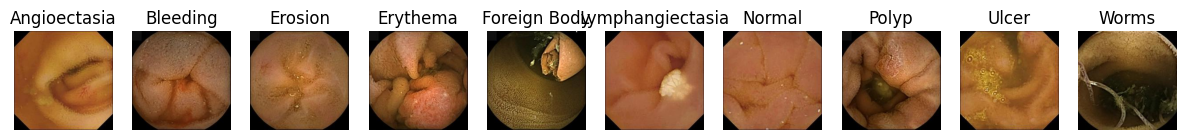

In [5]:
import random
import matplotlib.pyplot as plt

# List of label classes
label_classes = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp','Ulcer', 'Worms']

# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, (label, img_path) in zip(axes, images.items()):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Dictionary to hold one random image path per label
random_images = {}

# Iterate through each label class and pick one random image
for label in label_classes:
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        all_images = []
        for dataset in os.listdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                images = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.jpg')]
                all_images.extend(images)
        
        if all_images:
            random_image = random.choice(all_images)
            random_images[label] = random_image

# Display the selected images
display_images(random_images)


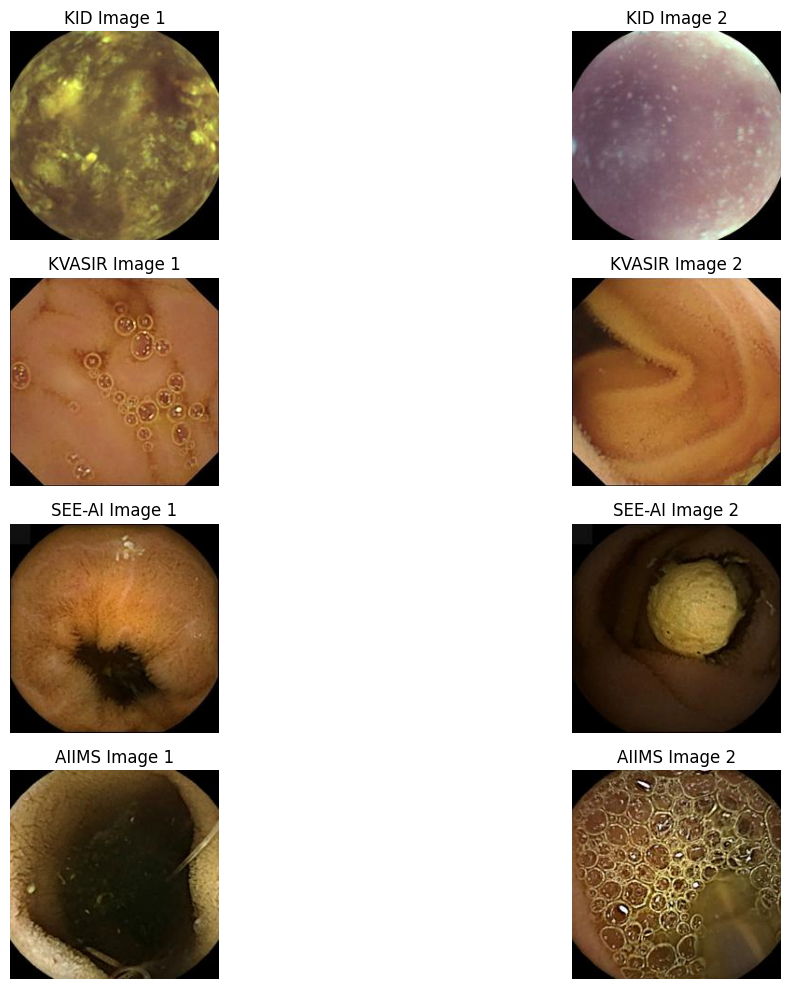

In [6]:
# List of dataset classes
dataset_classes = ['KID', 'KVASIR', 'SEE-AI', 'AIIMS']

# Function to display resized images
def display_resized_images(images):
    fig, axes = plt.subplots(len(images), 2, figsize=(15,10))
    for i, (dataset, img_paths) in enumerate(images.items()):
        for j, img_path in enumerate(img_paths):
            img = Image.open(img_path)
            img = img.resize((224, 224))  # Resize each image to 224x224
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{dataset} Image {j + 1}")
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

random_images = {}


for dataset in dataset_classes:
    all_images = []
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                images = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.jpg')]
                all_images.extend(images)
    
    if all_images:
        random_images[dataset] = random.sample(all_images, 2)  


display_resized_images(random_images)


In [7]:
df

,Dataset,Angioectasia,Bleeding,Erosion,Erythema,Foreign Body,Lymphangiectasia,Normal,Polyp,Ulcer,Worms
0,KID,18,3,0,0,0,6,315,34,0,0
1,KVASIR,606,312,354,111,543,414,24036,38,597,0
2,SEE-AI,530,519,2340,580,249,376,4312,1090,0,0
3,AIIMS,0,0,0,0,0,0,0,0,66,158


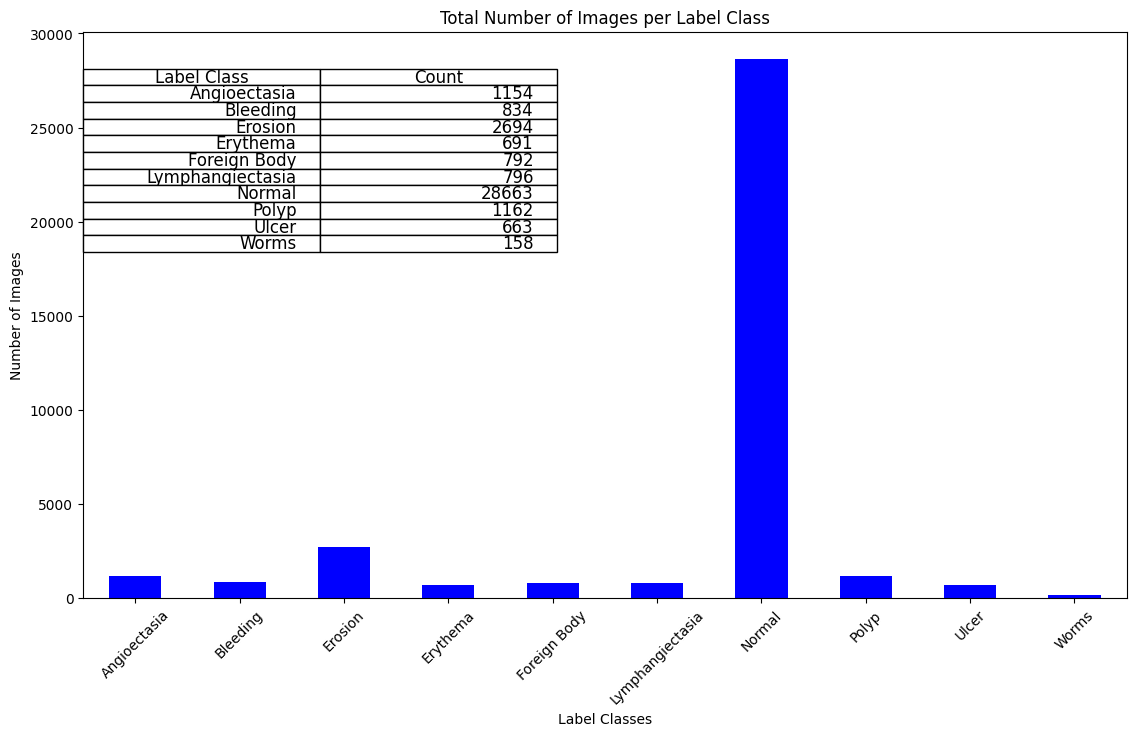

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
total_images = df.sum()[1:]  
total_images.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Total Number of Images per Label Class')
ax.set_xlabel('Label Classes')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', rotation=45)

fig.tight_layout(pad=3.0)
ax_table = fig.add_subplot(221)
ax_table.axis('off')  

table_data = []
for label in total_images.index:
    count = total_images[label]
    table_data.append((label, count))

table = ax_table.table(cellText=table_data, colLabels=['Label Class', 'Count'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.show()

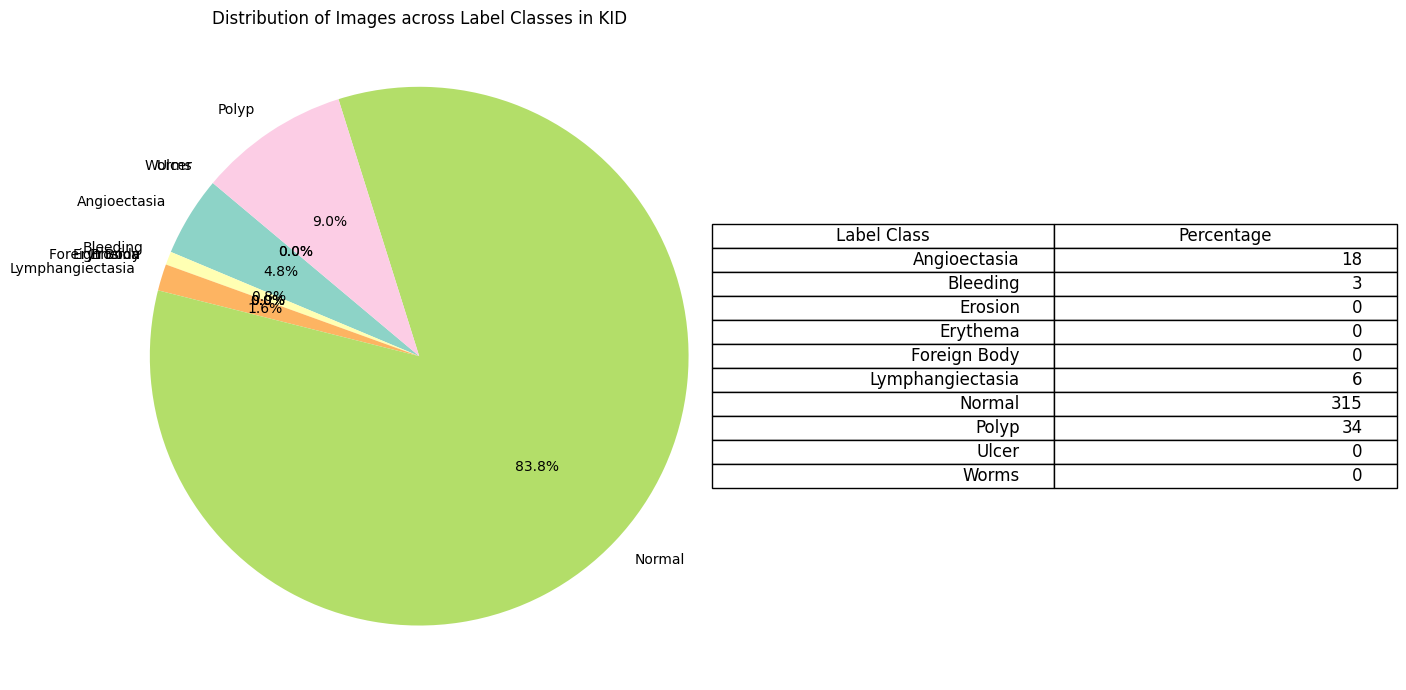

In [9]:
dataset_to_plot = 'KID'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

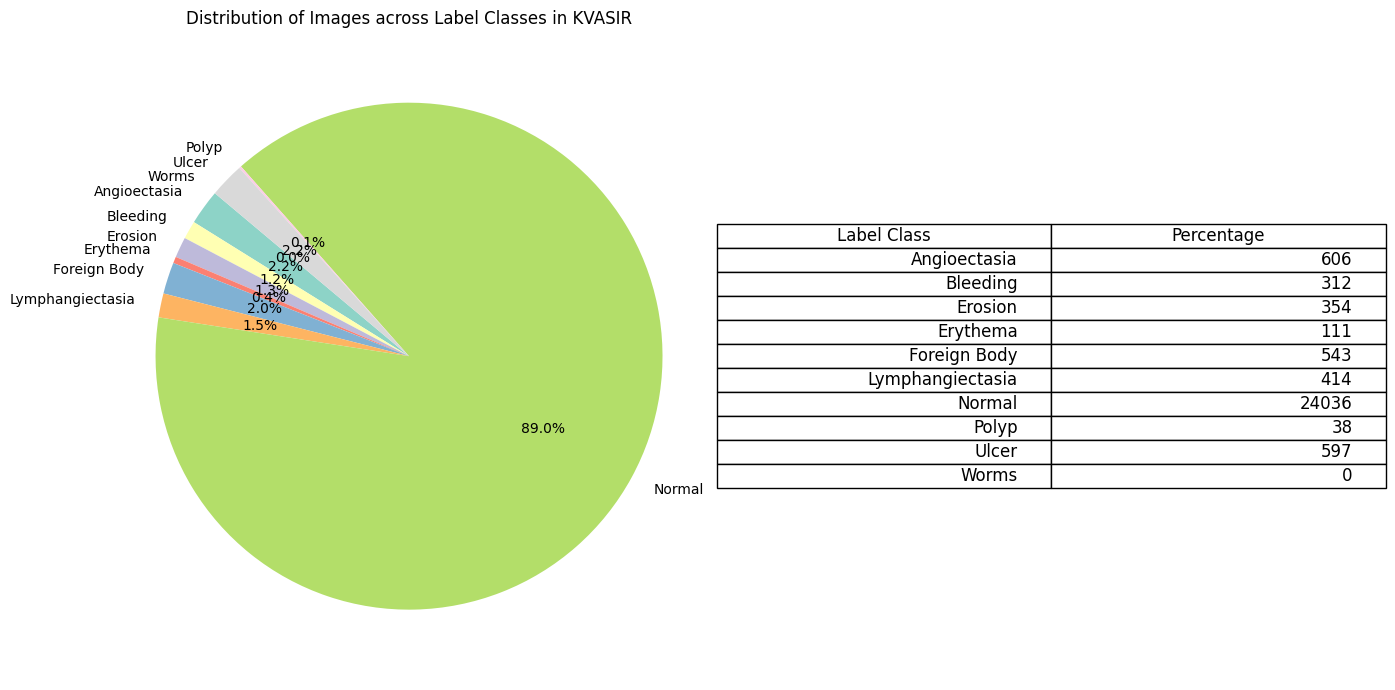

In [10]:
dataset_to_plot = 'KVASIR'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

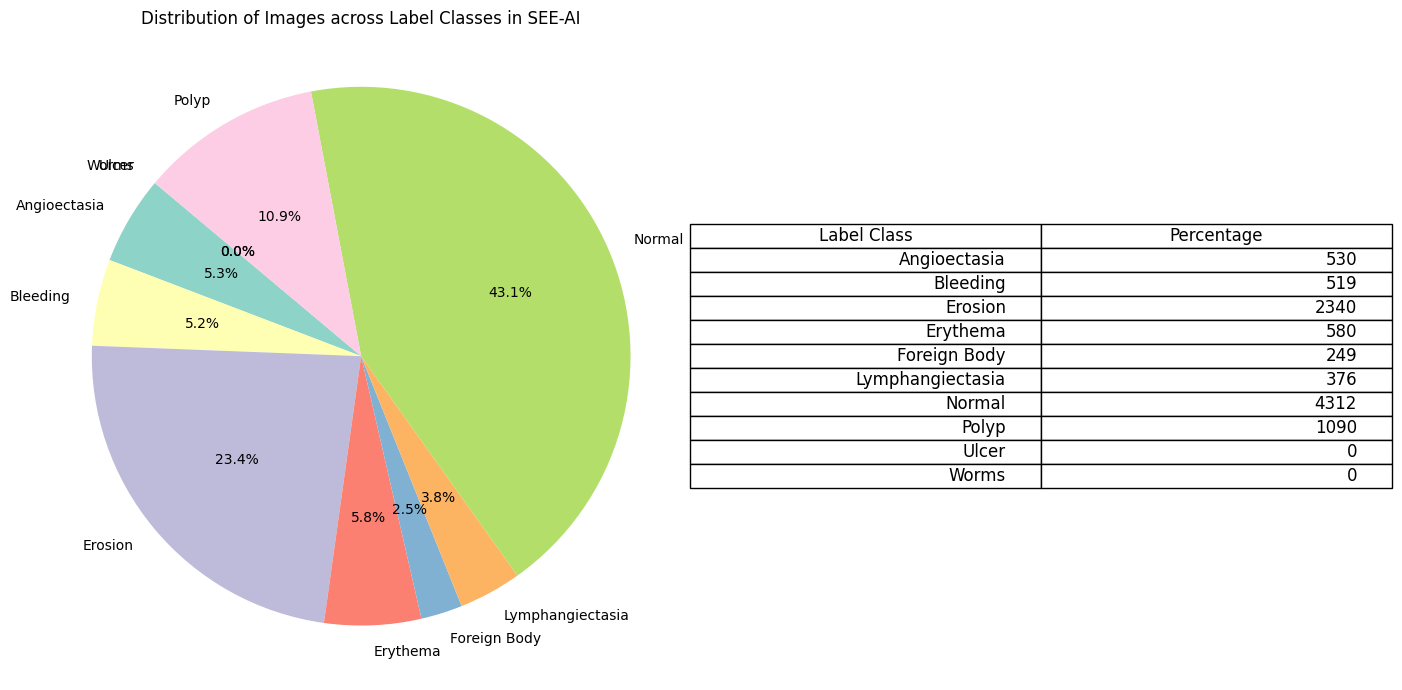

In [11]:
dataset_to_plot = 'SEE-AI'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

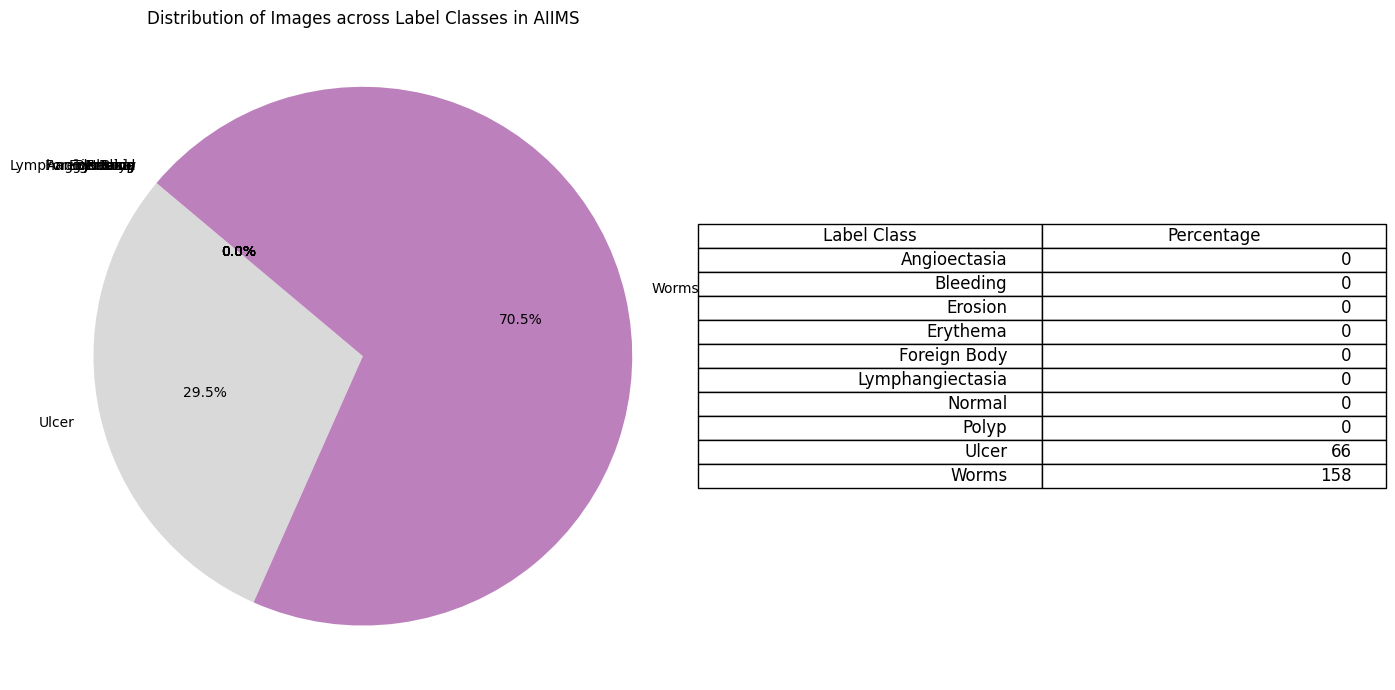

In [12]:
dataset_to_plot = 'AIIMS'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

# **VALIDATION DATA ANALYSIS**

In [13]:
import pandas as pd
# Define the columns for the dataframe
columns = ['Dataset', 'Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']
datasets = ['KID', 'KVASIR', 'SEE-AI', 'AIIMS']

df = pd.DataFrame(columns=columns)
df['Dataset'] = datasets

df = df.fillna(0)
print(df)


  Dataset  Angioectasia  Bleeding  Erosion  Erythema  Foreign Body  \
0     KID             0         0        0         0             0   
1  KVASIR             0         0        0         0             0   
2  SEE-AI             0         0        0         0             0   
3   AIIMS             0         0        0         0             0   

   Lymphangiectasia  Normal  Polyp  Ulcer  Worms  
0                 0       0      0      0      0  
1                 0       0      0      0      0  
2                 0       0      0      0      0  
3                 0       0      0      0      0  


In [14]:
data_counts = defaultdict(lambda: defaultdict(int))
data_path = "validation"
# Walk through the data_path
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for dataset in os.listdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                image_count = len([f for f in os.listdir(dataset_path) if f.endswith('.jpg')])
                data_counts[dataset][label] += image_count

# Populate the dataframe with counts from the data_counts dictionary
for dataset in datasets:
    for label in columns[1:]:  # Skip the 'Dataset' column
        df.loc[df['Dataset'] == dataset, label] = data_counts[dataset].get(label, 0)


print(df)


  Dataset  Angioectasia  Bleeding  Erosion  Erythema  Foreign Body  \
0     KID             9         2        0         0             0   
1  KVASIR           260       134      152        48           233   
2  SEE-AI           228       223     1003       249           107   
3   AIIMS             0         0        0         0             0   

   Lymphangiectasia  Normal  Polyp  Ulcer  Worms  
0                 3     136     15      0      0  
1               178   10302     17    257      0  
2               162    1849    468      0      0  
3                 0       0      0     29     68  


In [15]:
df.to_excel("validation_data_counts.xlsx", index=False)

In [16]:
invalid_images = []

for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for dataset in os.listdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                for image in os.listdir(dataset_path):
                    image_path = os.path.join(dataset_path, image)
                    try:
                        with Image.open(image_path) as img:
                            width, height = img.size
                            if width != 224 or height != 224:
                                invalid_images.append((image_path, (width, height)))
                    except Exception as e:
                        print(f"Error opening {image_path}: {e}")


if invalid_images:
    for image_path, dimensions in invalid_images:
        print(f"Invalid image: {image_path} with dimensions {dimensions}")
else:
    print("all images are 224*224 dimensions")


all images are 224*224 dimensions


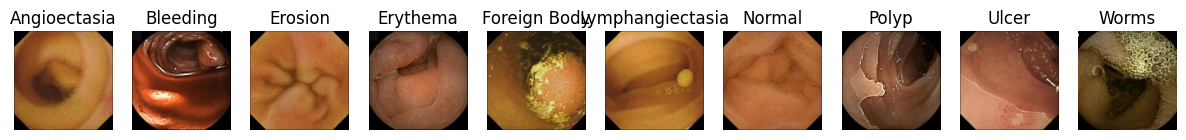

In [17]:
data_path = 'validation'  

label_classes = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp','Ulcer', 'Worms']

def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, (label, img_path) in zip(axes, images.items()):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Dictionary to hold one random image path per label
random_images = {}

# Iterate through each label class and pick one random image
for label in label_classes:
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        all_images = []
        for dataset in os.listdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                images = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.jpg')]
                all_images.extend(images)
        
        if all_images:
            random_image = random.choice(all_images)
            random_images[label] = random_image

# Display the selected images
display_images(random_images)


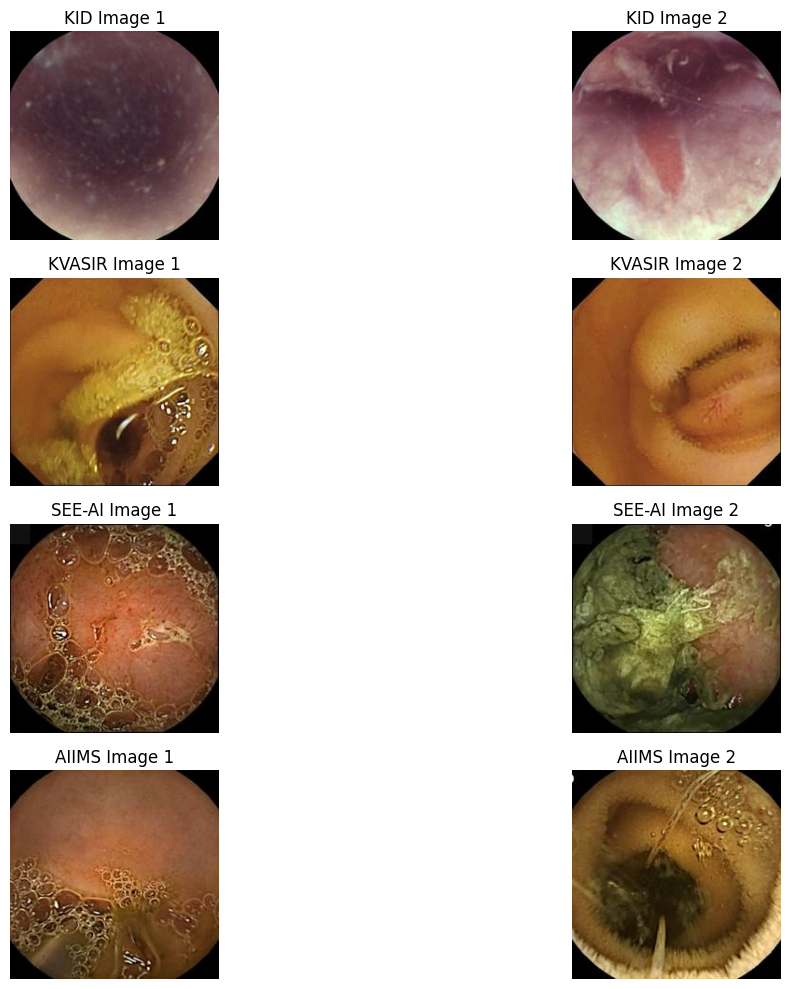

In [18]:
dataset_classes = ['KID', 'KVASIR', 'SEE-AI', 'AIIMS']

# Function to display resized images
def display_resized_images(images):
    fig, axes = plt.subplots(len(images), 2, figsize=(15,10))
    for i, (dataset, img_paths) in enumerate(images.items()):
        for j, img_path in enumerate(img_paths):
            img = Image.open(img_path)
            img = img.resize((224, 224))  # Resize each image to 224x224
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{dataset} Image {j + 1}")
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()


random_images = {}
for dataset in dataset_classes:
    all_images = []
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            dataset_path = os.path.join(label_path, dataset)
            if os.path.isdir(dataset_path):
                images = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.jpg')]
                all_images.extend(images)
    
    if all_images:
        random_images[dataset] = random.sample(all_images, 2)  

# Display the resized images
display_resized_images(random_images)


In [19]:
df

,Dataset,Angioectasia,Bleeding,Erosion,Erythema,Foreign Body,Lymphangiectasia,Normal,Polyp,Ulcer,Worms
0,KID,9,2,0,0,0,3,136,15,0,0
1,KVASIR,260,134,152,48,233,178,10302,17,257,0
2,SEE-AI,228,223,1003,249,107,162,1849,468,0,0
3,AIIMS,0,0,0,0,0,0,0,0,29,68


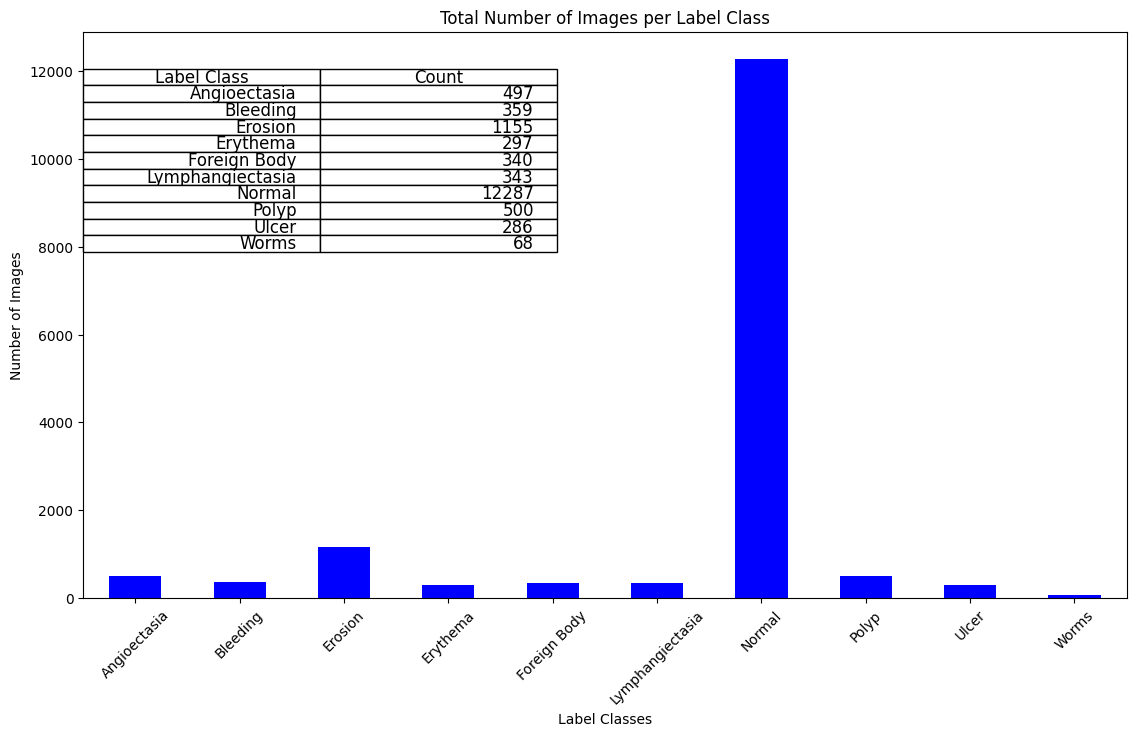

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
total_images = df.sum()[1:]  # Sum across all datasets, excluding 'Dataset' column
total_images.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Total Number of Images per Label Class')
ax.set_xlabel('Label Classes')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', rotation=45)


fig.tight_layout(pad=3.0)
ax_table = fig.add_subplot(221)
ax_table.axis('off') 
table_data = []
for label in total_images.index:
    count = total_images[label]
    table_data.append((label, count))

table = ax_table.table(cellText=table_data, colLabels=['Label Class', 'Count'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.show()

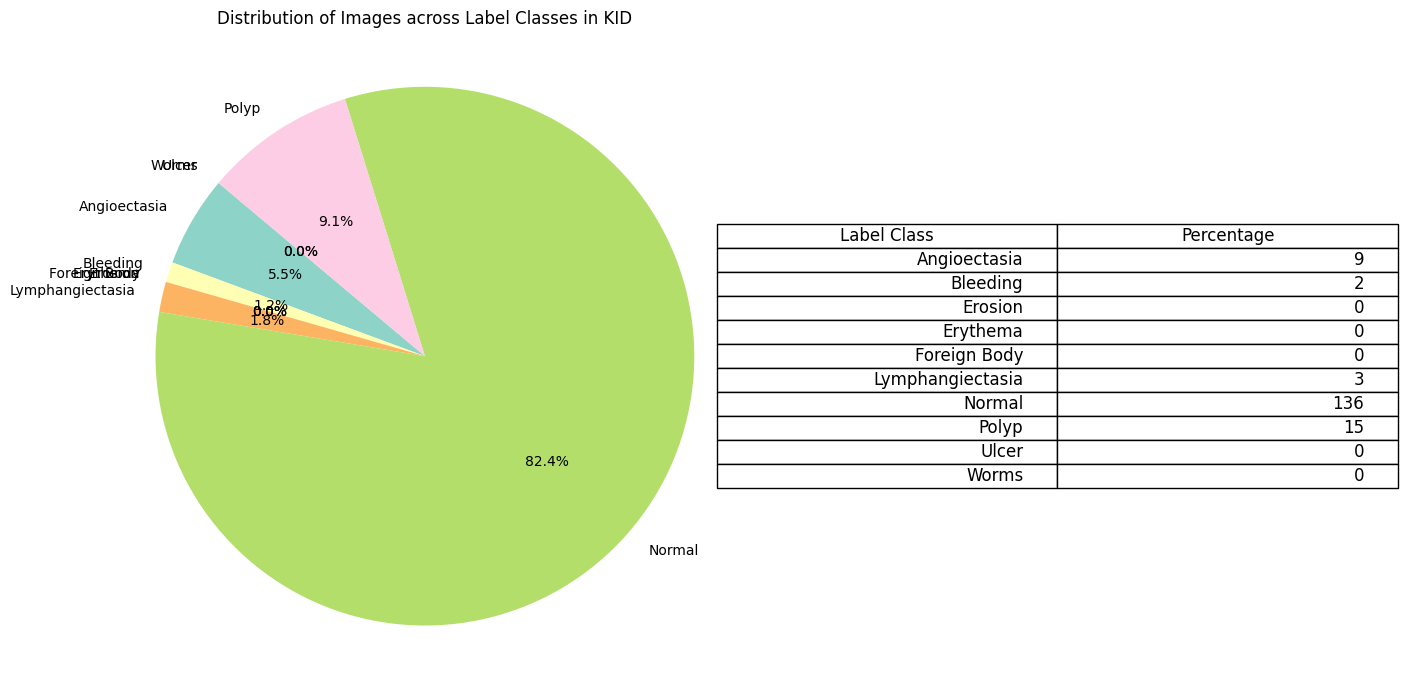

In [21]:
dataset_to_plot = 'KID'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

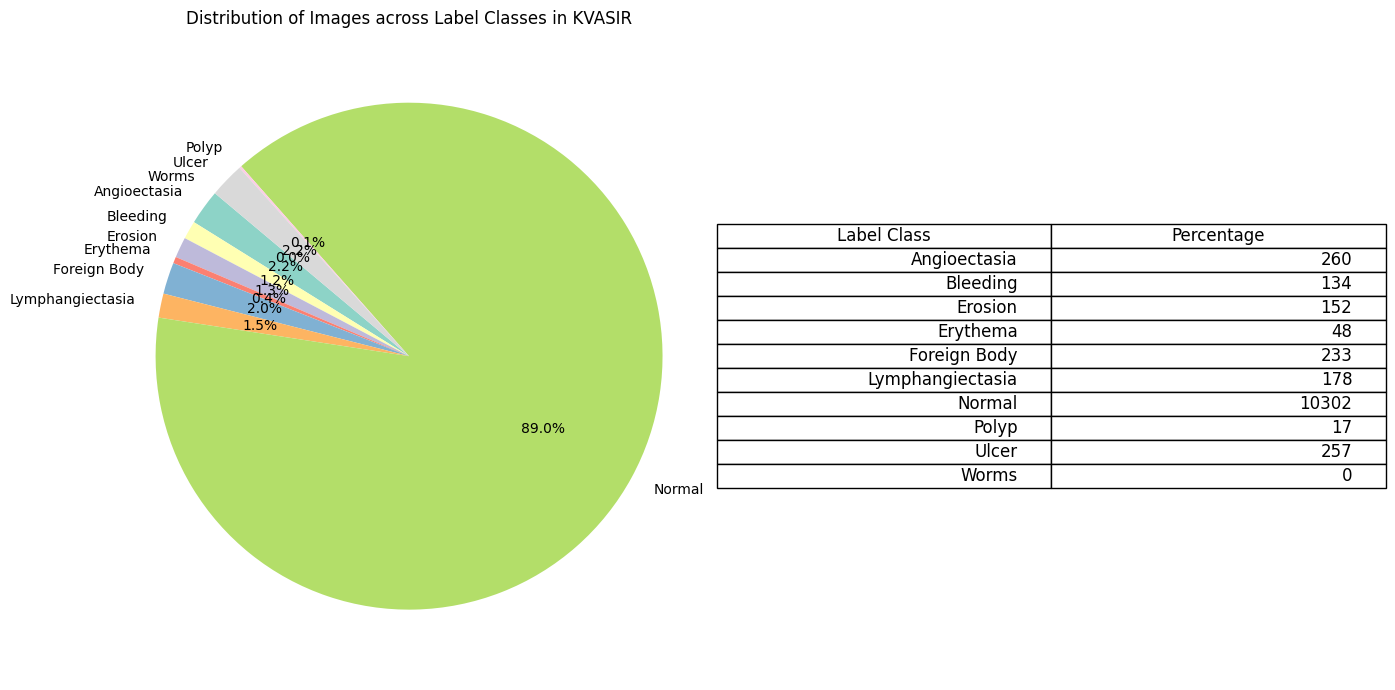

In [22]:
dataset_to_plot = 'KVASIR'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

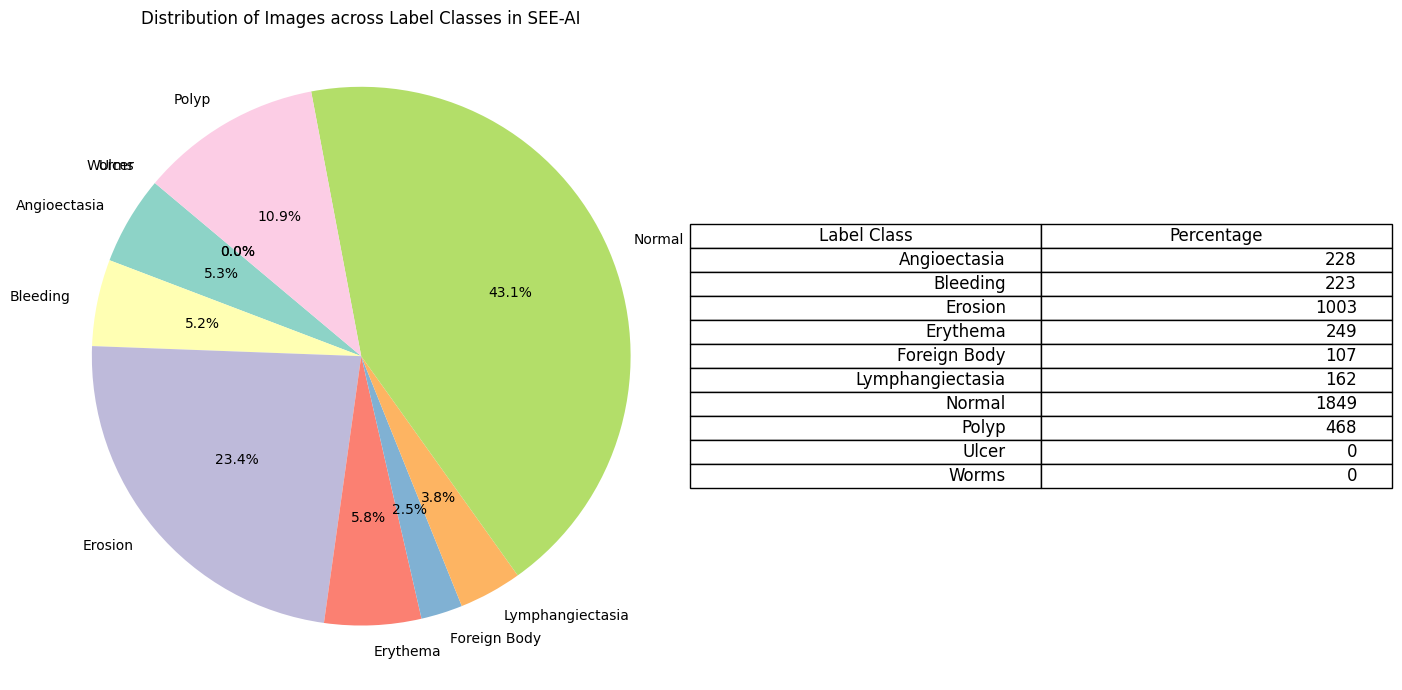

In [23]:
dataset_to_plot = 'SEE-AI'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()

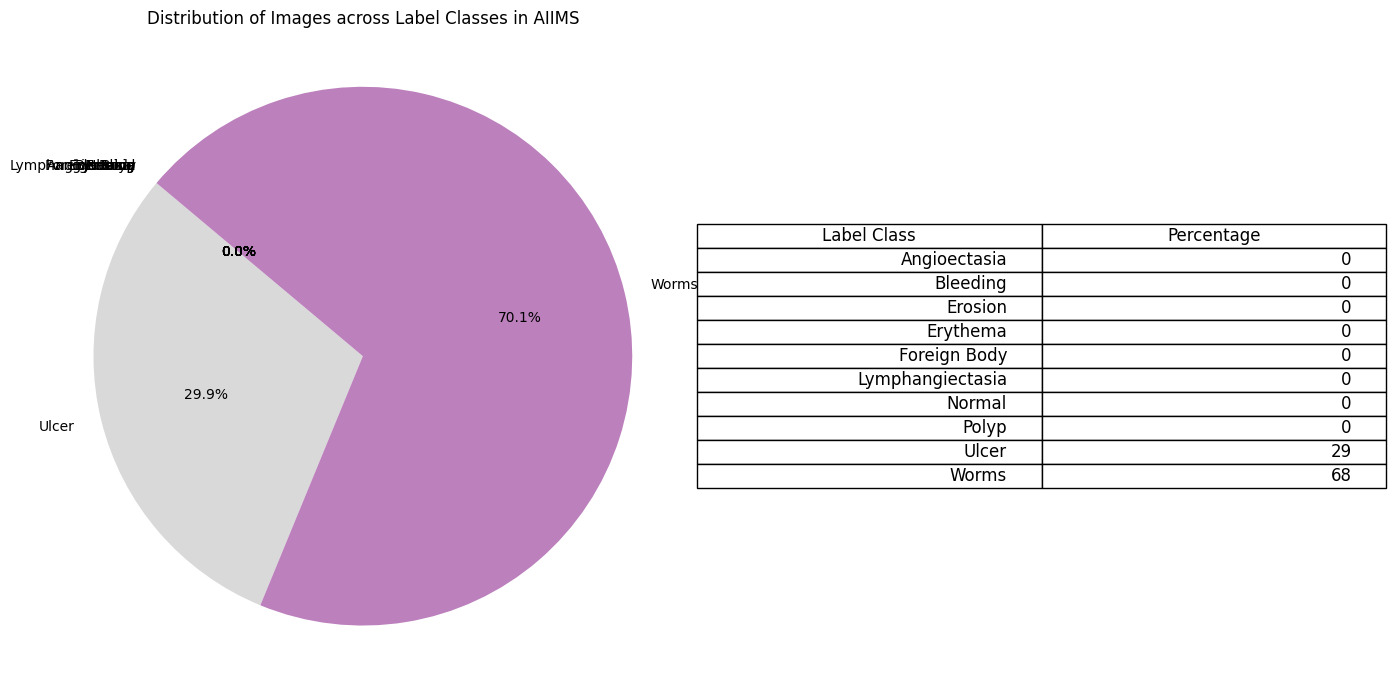

In [24]:
dataset_to_plot = 'AIIMS'

sizes = df.loc[df['Dataset'] == dataset_to_plot].iloc[0, 1:].values.astype(int)
labels = df.columns[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
ax1.set_title(f'Distribution of Images across Label Classes in {dataset_to_plot}')
ax1.axis('equal') 

# Side table
table_data = [(label, size) for label, size in zip(labels, sizes)]
table = ax2.table(cellText=table_data, colLabels=['Label Class', 'Percentage'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax2.axis('off')  
plt.tight_layout()
plt.show()